# Optimize feature selection
Many different features were calculated (49 in total). In this notebook we try different combinations of these features, to select the best combination. 
Also different weighting methods are selected for the "chemical neighbourhood score"

Different models trained are in order:

Run with 30 features for similar structures, without chemical neighbourhood score
Duplicate score to check how random forest behaves
Results training with cos scores 

### Load in scores

In [ ]:
import os
from ms2query.utils import load_pickled_file
from matplotlib import pyplot as plt

In [2]:
training_scores, training_labels, validation_scores, validation_labels = load_pickled_file("C:/Users/jonge094/PycharmProjects/PhD_MS2Query/ms2query/data/libraries_and_models/gnps_15_12_2021/ms2q_training_data_48_scores.pickle")
training_scores.head()

,query_precursor_mz,precursor_mz_difference,s2v_score,ms2ds_score,average_ms2ds_score_for_inchikey14,nr_of_spectra_with_same_inchikey14,chemical_neighbourhood_score,average_tanimoto_score_for_chemical_neighbourhood_score,nr_of_spectra_for_chemical_neighbourhood_score,cosine_score,...,nr_of_spectra_structure_6,average_ms2deepscore_7,tanimoto_score_structure_7,nr_of_spectra_structure_7,average_ms2deepscore_8,tanimoto_score_structure_8,nr_of_spectra_structure_8,average_ms2deepscore_9,tanimoto_score_structure_9,nr_of_spectra_structure_9
0,357.206,17.027,0.342509,0.958357,0.738493,2,0.566782,0.830279,71,0.843849,...,1,0.654104,0.714286,1,0.779384,0.685567,2,0.664638,0.668224,2
1,495.381,121.148,0.120013,0.871954,0.582930,23,0.474917,0.914574,490,0.040108,...,15,0.575334,0.833770,13,0.599541,0.825916,1,0.577323,0.806069,25
2,373.165,1.068,0.234691,0.867854,0.793660,4,0.558125,0.739186,27,0.183264,...,1,0.360988,0.673967,1,0.594069,0.672654,2,0.321590,0.672294,1
3,455.290,81.057,0.082091,0.865033,0.653571,50,0.639768,0.880209,90,0.064454,...,2,0.393941,0.510050,1,0.511891,0.506122,1,0.451606,0.505410,2
4,373.165,1.068,0.280886,0.861416,0.793660,4,0.558125,0.739186,27,0.131869,...,1,0.360988,0.673967,1,0.594069,0.672654,2,0.321590,0.672294,1


In [3]:
training_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 49 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   query_precursor_mz                                       467600 non-null  float64
 1   precursor_mz_difference                                  467600 non-null  float64
 2   s2v_score                                                467600 non-null  float64
 3   ms2ds_score                                              467600 non-null  float64
 4   average_ms2ds_score_for_inchikey14                       467600 non-null  float64
 5   nr_of_spectra_with_same_inchikey14                       467600 non-null  int64  
 6   chemical_neighbourhood_score                             467600 non-null  float64
 7   average_tanimoto_score_for_chemical_neighbourhood_score  467600 non-null  float64
 8   nr_of_spectra_

# Add different scores for weighting tanimoto scores
Different weighting methods are selected for the "chemical neighbourhood score" and added as features


In [4]:
from tqdm.notebook import tqdm

def add_different_weighting(dataframe, power_tanimioto):
    new_score = []
    for index, row in tqdm(dataframe.iterrows()):
        total_weight = 0
        total_ms2ds = 0 
        for i in range(10):
            average_ms2ds = row["average_ms2deepscore_" + str(i)]
            tanimoto_score = row["tanimoto_score_structure_" + str(i)]
            nr_of_spectra = row["nr_of_spectra_structure_" + str(i)]
            weight = nr_of_spectra * tanimoto_score**power_tanimioto
            total_weight += weight
            weighted_score = average_ms2ds * weight
            total_ms2ds += weighted_score
        average = total_ms2ds/total_weight
        new_score.append(average)
    dataframe["chemical_neighbourhood_tanimoto_"+str(power_tanimioto)] = new_score


In [5]:
from tqdm.notebook import tqdm

def no_nr_of_spectra_filtering(dataframe, power_tanimioto):
    new_score = []
    for index, row in tqdm(dataframe.iterrows()):
        total_weight = 0
        total_ms2ds = 0 
        for i in range(10):
            average_ms2ds = row["average_ms2deepscore_" + str(i)]
            tanimoto_score = row["tanimoto_score_structure_" + str(i)]
            weight = tanimoto_score**power_tanimioto
            total_weight += weight
            weighted_score = average_ms2ds * weight
            total_ms2ds += weighted_score
        average = total_ms2ds/total_weight
        new_score.append(average)
    dataframe["chemical_neighbourhood_no_spectrum_nr_tanimoto_power"+str(power_tanimioto)] = new_score

In [6]:
no_nr_of_spectra_filtering(training_scores, 1)
no_nr_of_spectra_filtering(validation_scores, 1)
no_nr_of_spectra_filtering(training_scores, 2)
no_nr_of_spectra_filtering(validation_scores, 2)
no_nr_of_spectra_filtering(training_scores, 3)
no_nr_of_spectra_filtering(validation_scores, 3)
no_nr_of_spectra_filtering(training_scores, 4)
no_nr_of_spectra_filtering(validation_scores, 4)
no_nr_of_spectra_filtering(training_scores, 5)
no_nr_of_spectra_filtering(validation_scores, 5)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [18]:
no_nr_of_spectra_filtering(training_scores, 0)
no_nr_of_spectra_filtering(validation_scores, 0)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [28]:
import pickle
pickle.dump((training_scores, training_labels, validation_scores, validation_labels), 
            open("C:/Users/jonge094/PycharmProjects/PhD_MS2Query/ms2query/data/libraries_and_models/gnps_15_12_2021/ms2q_training_data_with_additional_weigthing_scores.pickle", "wb"))

In [7]:
training_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   query_precursor_mz                                       467600 non-null  float64
 1   precursor_mz_difference                                  467600 non-null  float64
 2   s2v_score                                                467600 non-null  float64
 3   ms2ds_score                                              467600 non-null  float64
 4   average_ms2ds_score_for_inchikey14                       467600 non-null  float64
 5   nr_of_spectra_with_same_inchikey14                       467600 non-null  int64  
 6   chemical_neighbourhood_score                             467600 non-null  float64
 7   average_tanimoto_score_for_chemical_neighbourhood_score  467600 non-null  float64
 8   nr_of_spectra_

In [10]:
training_scores[["chemical_neighbourhood_score","chemical_neighbourhood_no_spectrum_nr_tanimoto_power1"]].head()

,chemical_neighbourhood_score,chemical_neighbourhood_no_spectrum_nr_tanimoto_power1
0,0.566782,0.650291
1,0.474917,0.568944
2,0.558125,0.499523
3,0.639768,0.621954
4,0.558125,0.499523


### Run on different weighted chemical neighbourhood scores, no 30 seperated features. 

In [11]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "average_ms2ds_score_for_inchikey14",
                            "nr_of_spectra_with_same_inchikey14",
                            "chemical_neighbourhood_score",
                            "average_tanimoto_score_for_chemical_neighbourhood_score",
                            "nr_of_spectra_for_chemical_neighbourhood_score",
                            "cosine_score",
                            "modified_cosine_score",
                            "lib_instrument_orbitrap",
                            "lib_instrument_ion_trap",
                            "lib_instrument_tof",
                            "lib_instrument_quadrupole",
                            "query_instrument_orbitrap",
                            "query_instrument_ion_trap",
                            "query_instrument_tof",
                            "query_instrument_quadrupole", 
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power1",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power2",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power3",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power4",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power5"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]

In [12]:
selection_of_training_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   query_precursor_mz                                       467600 non-null  float64
 1   precursor_mz_difference                                  467600 non-null  float64
 2   s2v_score                                                467600 non-null  float64
 3   ms2ds_score                                              467600 non-null  float64
 4   average_ms2ds_score_for_inchikey14                       467600 non-null  float64
 5   nr_of_spectra_with_same_inchikey14                       467600 non-null  int64  
 6   chemical_neighbourhood_score                             467600 non-null  float64
 7   average_tanimoto_score_for_chemical_neighbourhood_score  467600 non-null  float64
 8   nr_of_spectra_

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/3098899076.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   36.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  2.8min
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  3.6min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.028199874153398027
Validation MSE 0.025958314077247153
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power1 Importance: 0.57
Variable: precursor_mz_difference Importance: 0.18
Variable: query_precursor_mz   Importance: 0.14
Variable: s2v_score            Importance: 0.05
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power2 Importance: 0.04
Variable: ms2ds_score          Importance: 0.02
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14 Importance: 0.0
Variable: chemical_neighbourhood_score Importance: 0.0
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score Importance: 0.0
Variable: cosine_score         Importance: 0.0
Variable: modified_cosine_score Importance: 0.0
Variable: lib_instrument_orbitrap Importance: 0.0
Variable: lib_instrument_ion_trap Importance: 0.0
Variable: lib_instrument_tof   Importance: 0.0

[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [21]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power0",
                           "chemical_neighbourhood_no_spectrum_nr_tanimoto_power1",
                           "chemical_neighbourhood_no_spectrum_nr_tanimoto_power2",
                           "chemical_neighbourhood_no_spectrum_nr_tanimoto_power3",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power4",
                              "chemical_neighbourhood_no_spectrum_nr_tanimoto_power5",                          
                           "average_tanimoto_score_for_chemical_neighbourhood_score",
                           "average_ms2ds_score_for_inchikey14"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   query_precursor_mz                                       467600 non-null  float64
 1   precursor_mz_difference                                  467600 non-null  float64
 2   s2v_score                                                467600 non-null  float64
 3   ms2ds_score                                              467600 non-null  float64
 4   chemical_neighbourhood_no_spectrum_nr_tanimoto_power0    467600 non-null  float64
 5   chemical_neighbourhood_no_spectrum_nr_tanimoto_power1    467600 non-null  float64
 6   chemical_neighbourhood_no_spectrum_nr_tanimoto_power2    467600 non-null  float64
 7   chemical_neighbourhood_no_spectrum_nr_tanimoto_power3    467600 non-null  float64
 8   chemical_neigh

C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/3811296234.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   24.3s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  3.2min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.028181308128234717
Validation MSE 0.02594734535749837
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power1 Importance: 0.46
Variable: precursor_mz_difference Importance: 0.18
Variable: query_precursor_mz   Importance: 0.14
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power0 Importance: 0.12
Variable: s2v_score            Importance: 0.05
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power2 Importance: 0.03
Variable: ms2ds_score          Importance: 0.02
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.01
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power3 Importance: 0.0
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power4 Importance: 0.0
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power5 Importance: 0.0
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None, None, None, None, None, None, None, None, None]

# Run on final selection

In [15]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power1"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   query_precursor_mz                                     467600 non-null  float64
 1   precursor_mz_difference                                467600 non-null  float64
 2   s2v_score                                              467600 non-null  float64
 3   ms2ds_score                                            467600 non-null  float64
 4   chemical_neighbourhood_no_spectrum_nr_tanimoto_power1  467600 non-null  float64
dtypes: float64(5)
memory usage: 17.8 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/2325191212.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    7.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   48.0s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  1.1min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.028375345962102953
Validation MSE 0.026004592509868557
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power1 Importance: 0.61
Variable: precursor_mz_difference Importance: 0.18
Variable: query_precursor_mz   Importance: 0.14
Variable: s2v_score            Importance: 0.05
Variable: ms2ds_score          Importance: 0.02


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None, None]

### Performance with one library spectra instead of 10

In [27]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "average_ms2ds_score_for_inchikey14"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   query_precursor_mz                  467600 non-null  float64
 1   precursor_mz_difference             467600 non-null  float64
 2   s2v_score                           467600 non-null  float64
 3   ms2ds_score                         467600 non-null  float64
 4   average_ms2ds_score_for_inchikey14  467600 non-null  float64
dtypes: float64(5)
memory usage: 17.8 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/2151528380.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    7.6s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   48.0s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  1.1min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.03264100050590641
Validation MSE 0.030927552294164298
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.38
Variable: query_precursor_mz   Importance: 0.27
Variable: precursor_mz_difference Importance: 0.19
Variable: s2v_score            Importance: 0.14
Variable: ms2ds_score          Importance: 0.02


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.3s finished


[None, None, None, None, None]

### Remove ms2ds

In [24]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power1"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   query_precursor_mz                                     467600 non-null  float64
 1   precursor_mz_difference                                467600 non-null  float64
 2   chemical_neighbourhood_no_spectrum_nr_tanimoto_power1  467600 non-null  float64
dtypes: float64(3)
memory usage: 10.7 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/1437698772.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    4.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   21.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:   31.8s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.029116099226334485
Validation MSE 0.027359031218750923
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power1 Importance: 0.64
Variable: precursor_mz_difference Importance: 0.2
Variable: query_precursor_mz   Importance: 0.15


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None]

#### Only cosine score

In [25]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "cosine_score",
                            "modified_cosine_score"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   query_precursor_mz       467600 non-null  float64
 1   precursor_mz_difference  467600 non-null  float64
 2   cosine_score             467600 non-null  float64
 3   modified_cosine_score    467600 non-null  float64
dtypes: float64(4)
memory usage: 14.3 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/2359213779.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    5.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   32.9s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:   47.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.03624574130161057
Validation MSE 0.034595751645214
Variable: query_precursor_mz   Importance: 0.56
Variable: precursor_mz_difference Importance: 0.4
Variable: cosine_score         Importance: 0.03
Variable: modified_cosine_score Importance: 0.02


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None]

### Only MS2Ds, mass and s2v

In [26]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   query_precursor_mz       467600 non-null  float64
 1   precursor_mz_difference  467600 non-null  float64
 2   s2v_score                467600 non-null  float64
 3   ms2ds_score              467600 non-null  float64
dtypes: float64(4)
memory usage: 14.3 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/261556562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    5.6s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   37.4s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:   51.4s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tas

Training MSE 0.0341848422394692
Validation MSE 0.03223034785619399
Variable: query_precursor_mz   Importance: 0.35
Variable: ms2ds_score          Importance: 0.26
Variable: precursor_mz_difference Importance: 0.24
Variable: s2v_score            Importance: 0.14


[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None]

# Run for tanimoto ** 2 no spectrum nr

In [16]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power2"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   query_precursor_mz                                     467600 non-null  float64
 1   precursor_mz_difference                                467600 non-null  float64
 2   s2v_score                                              467600 non-null  float64
 3   ms2ds_score                                            467600 non-null  float64
 4   chemical_neighbourhood_no_spectrum_nr_tanimoto_power2  467600 non-null  float64
dtypes: float64(5)
memory usage: 17.8 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/4214665337.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    7.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   45.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  1.0min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.028592099874380692
Validation MSE 0.026239289479840083
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power2 Importance: 0.61
Variable: precursor_mz_difference Importance: 0.17
Variable: query_precursor_mz   Importance: 0.15
Variable: s2v_score            Importance: 0.05
Variable: ms2ds_score          Importance: 0.02


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None, None]

In [17]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power3"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   query_precursor_mz                                     467600 non-null  float64
 1   precursor_mz_difference                                467600 non-null  float64
 2   s2v_score                                              467600 non-null  float64
 3   ms2ds_score                                            467600 non-null  float64
 4   chemical_neighbourhood_no_spectrum_nr_tanimoto_power3  467600 non-null  float64
dtypes: float64(5)
memory usage: 17.8 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/3363698396.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    7.2s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   49.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  1.1min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.02900090331946365
Validation MSE 0.02658879720884345
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power3 Importance: 0.61
Variable: query_precursor_mz   Importance: 0.17
Variable: precursor_mz_difference Importance: 0.17
Variable: s2v_score            Importance: 0.05
Variable: ms2ds_score          Importance: 0.0


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None, None]

In [19]:
subselection_of_features = ["query_precursor_mz",
                            "precursor_mz_difference",
                            "s2v_score",
                            "ms2ds_score",
                            "chemical_neighbourhood_no_spectrum_nr_tanimoto_power0"]
selection_of_training_scores = training_scores[subselection_of_features]
selection_of_validation_scores = validation_scores[subselection_of_features]
selection_of_training_scores.info()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=7)
rf.fit(selection_of_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selection_of_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selection_of_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selection_of_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   query_precursor_mz                                     467600 non-null  float64
 1   precursor_mz_difference                                467600 non-null  float64
 2   s2v_score                                              467600 non-null  float64
 3   ms2ds_score                                            467600 non-null  float64
 4   chemical_neighbourhood_no_spectrum_nr_tanimoto_power0  467600 non-null  float64
dtypes: float64(5)
memory usage: 17.8 MB


C:\Users\jonge094\AppData\Local\Temp/ipykernel_10312/2283961063.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selection_of_training_scores, training_labels)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    9.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   50.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  1.2min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Training MSE 0.02826842554510124
Validation MSE 0.02571552323007786
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power0 Importance: 0.61
Variable: precursor_mz_difference Importance: 0.18
Variable: query_precursor_mz   Importance: 0.14
Variable: s2v_score            Importance: 0.05
Variable: ms2ds_score          Importance: 0.02


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.2s finished


[None, None, None, None, None]

### Run on all scores

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=-1)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_35220/278076265.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training MSE 0.028084835705205147


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.4s finished


Validation MSE 0.02558998386978749
Variable: chemical_neighbourhood_no_spectrum_nr_tanimoto_power1 Importance: 0.6
Variable: precursor_mz_difference Importance: 0.18
Variable: query_precursor_mz   Importance: 0.13
Variable: s2v_score            Importance: 0.05
Variable: ms2ds_score          Importance: 0.02
Variable: tanimoto_score_structure_5 Importance: 0.01
Variable: average_ms2deepscore_7 Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14 Importance: 0.0
Variable: chemical_neighbourhood_score Importance: 0.0
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score Importance: 0.0
Variable: cosine_score         Importance: 0.0
Variable: modified_cosine_score Importance: 0.0
Variable: lib_instrument_orbitrap Importance: 0.0
Variable: lib_instrument_ion_trap Importance: 0.0
Variable: lib_instrument_tof   Importance: 0.0
Variable: li

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=-1)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_35220/278076265.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Training MSE 0.029232459560008722
Validation MSE 0.028652059157727092
Variable: chemical_neighbourhood_score Importance: 0.43
Variable: precursor_mz_difference Importance: 0.16
Variable: query_precursor_mz   Importance: 0.14
Variable: s2v_score            Importance: 0.11
Variable: average_ms2deepscore_9 Importance: 0.04
Variable: tanimoto_score_structure_7 Importance: 0.02
Variable: tanimoto_score_structure_9 Importance: 0.02
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2deepscore_1 Importance: 0.01
Variable: average_ms2deepscore_3 Importance: 0.01
Variable: average_ms2deepscore_5 Importance: 0.01
Variable: average_ms2deepscore_6 Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14 Importance: 0.0
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score Importance: 0.0
Variable: cosine_score         Importance: 0

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.2s finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [59]:
training_scores.corr()

,query_precursor_mz,precursor_mz_difference,s2v_score,ms2ds_score,average_ms2ds_score_for_inchikey14,nr_of_spectra_with_same_inchikey14,chemical_neighbourhood_score,average_tanimoto_score_for_chemical_neighbourhood_score,nr_of_spectra_for_chemical_neighbourhood_score,cosine_score,...,average_ms2deepscore_8,tanimoto_score_structure_8,nr_of_spectra_structure_8,average_ms2deepscore_9,tanimoto_score_structure_9,nr_of_spectra_structure_9,chemical_neighbourhood_tanimoto_3,chemical_neighbourhood_no_spectrum_nr_tanimoto_power1,chemical_neighbourhood_tanimoto_4,chemical_neighbourhood_tanimoto_5
query_precursor_mz,1.000000,0.376204,0.060726,0.280129,0.252732,-0.068031,0.367003,0.401451,-0.006880,-0.174724,...,0.345448,0.477739,0.051192,0.347443,0.484518,0.004490,0.323522,0.352519,0.303038,0.285893
precursor_mz_difference,0.376204,1.000000,-0.159887,-0.049766,-0.060590,0.006943,-0.029210,0.105554,0.013430,-0.130538,...,-0.010312,0.106936,0.033204,-0.013854,0.108111,-0.006929,-0.044686,-0.039129,-0.051350,-0.056701
s2v_score,0.060726,-0.159887,1.000000,0.292340,0.277627,-0.095746,0.220795,0.016752,-0.105255,0.256245,...,0.191030,0.046601,-0.026938,0.190920,0.047476,-0.038428,0.230656,0.250778,0.234396,0.237673
ms2ds_score,0.280129,-0.049766,0.292340,1.000000,0.465841,0.021132,0.493936,0.258245,0.094478,0.426974,...,0.390889,0.305707,0.067034,0.395373,0.307129,0.057550,0.485797,0.461083,0.479370,0.473221
average_ms2ds_score_for_inchikey14,0.252732,-0.060590,0.277627,0.465841,1.000000,-0.319088,0.776430,0.016046,-0.220868,0.112303,...,0.596604,0.168498,-0.037785,0.579684,0.167204,-0.044200,0.823672,0.789089,0.841307,0.855410
nr_of_spectra_with_same_inchikey14,-0.068031,0.006943,-0.095746,0.021132,-0.319088,1.000000,-0.105165,0.331616,0.655639,0.028875,...,-0.084394,0.153997,0.219161,-0.049468,0.155055,0.128287,-0.144255,-0.138126,-0.162716,-0.178775
chemical_neighbourhood_score,0.367003,-0.029210,0.220795,0.493936,0.776430,-0.105165,1.000000,0.341885,-0.121845,0.050612,...,0.778365,0.376794,-0.024232,0.766231,0.373542,-0.044909,0.979220,0.916760,0.959757,0.940077
average_tanimoto_score_for_chemical_neighbourhood_score,0.401451,0.105554,0.016752,0.258245,0.016046,0.331616,0.341885,1.000000,0.295781,-0.053413,...,0.370047,0.858453,0.094969,0.383896,0.851443,0.042888,0.210808,0.303177,0.150899,0.101793
nr_of_spectra_for_chemical_neighbourhood_score,-0.006880,0.013430,-0.105255,0.094478,-0.220868,0.655639,-0.121845,0.295781,1.000000,0.031652,...,-0.013231,0.314493,0.481313,0.007455,0.314768,0.425647,-0.173167,-0.077132,-0.193787,-0.210055
cosine_score,-0.174724,-0.130538,0.256245,0.426974,0.112303,0.028875,0.050612,-0.053413,0.031652,1.000000,...,-0.014836,-0.067477,0.012557,-0.007853,-0.070049,0.022090,0.072754,0.025297,0.081594,0.088477


### Check if the tanimoto score distribution is relatively equal

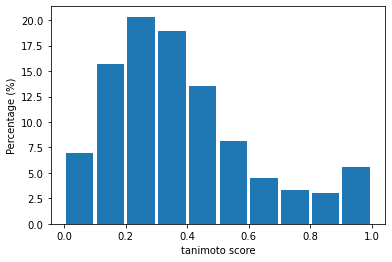

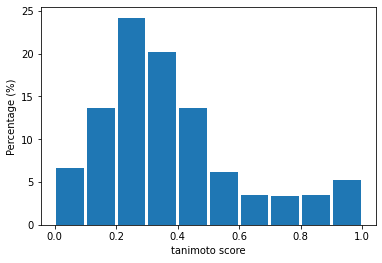

In [18]:
weight_to_convert_to_percentage = 100/len(training_labels)
weights = [weight_to_convert_to_percentage] * len(training_labels)
plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(training_labels, weights = weights, rwidth = 0.9)
plt.show()

weight_to_convert_to_percentage = 100/len(validation_labels)
weights = [weight_to_convert_to_percentage] * len(validation_labels)
plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(validation_labels, weights = weights, rwidth = 0.9)
plt.show()

# Results all features

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below
num_est = 250 # number of trees that will be built
rf = RandomForestRegressor(n_estimators = num_est, random_state = 42, max_depth = 5, verbose=1)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_35220/3057910552.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 19.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training MSE 0.02922435204677991
Validation MSE 0.02864085126490687
Variable: chemical_neighbourhood_score Importance: 0.43
Variable: precursor_mz_difference Importance: 0.16
Variable: query_precursor_mz   Importance: 0.14
Variable: s2v_score            Importance: 0.11
Variable: average_ms2deepscore_9 Importance: 0.04
Variable: tanimoto_score_structure_7 Importance: 0.02
Variable: tanimoto_score_structure_9 Importance: 0.02
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2deepscore_1 Importance: 0.01
Variable: average_ms2deepscore_3 Importance: 0.01
Variable: average_ms2deepscore_5 Importance: 0.01
Variable: average_ms2deepscore_6 Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14 Importance: 0.0
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score Importance: 0.0
Variable: cosine_score         Importance: 0.0

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.8s finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Tune settings

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=-1)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_35220/278076265.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training MSE 0.029233031734963836


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


Validation MSE 0.028655398385403413
Variable: chemical_neighbourhood_score Importance: 0.43
Variable: precursor_mz_difference Importance: 0.16
Variable: query_precursor_mz   Importance: 0.14
Variable: s2v_score            Importance: 0.11
Variable: average_ms2deepscore_9 Importance: 0.04
Variable: tanimoto_score_structure_7 Importance: 0.02
Variable: tanimoto_score_structure_9 Importance: 0.02
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2deepscore_1 Importance: 0.01
Variable: average_ms2deepscore_3 Importance: 0.01
Variable: average_ms2deepscore_5 Importance: 0.01
Variable: average_ms2deepscore_6 Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14 Importance: 0.0
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score Importance: 0.0
Variable: cosine_score         Importance: 0.0
Variable: modified_cosine_score

[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.2s finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Run with 30 features for similar structures, without chemical neighbourhood score

In [31]:
columns_to_drop = ["average_ms2ds_score_for_inchikey14",
                       "nr_of_spectra_with_same_inchikey14",
                       "chemical_neighbourhood_score",
                       "average_tanimoto_score_for_chemical_neighbourhood_score",
                       "nr_of_spectra_for_chemical_neighbourhood_score",
                   "lib_instrument_orbitrap",
                       "lib_instrument_ion_trap",
                       "lib_instrument_tof",
                       "lib_instrument_quadrupole",
                       "query_instrument_orbitrap",
                       "query_instrument_ion_trap",
                       "query_instrument_tof",
                       "query_instrument_quadrupole"]
selected_training_scores = training_scores.drop(columns_to_drop, axis=1)
selected_validation_scores = validation_scores.drop(columns_to_drop, axis=1)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=-1)
rf.fit(selected_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selected_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selected_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selected_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_35220/1839702755.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selected_training_scores, training_labels)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Training MSE 0.029163197001385248
Validation MSE 0.027283918454377432
Variable: average_ms2deepscore_9 Importance: 0.37
Variable: precursor_mz_difference Importance: 0.2
Variable: query_precursor_mz   Importance: 0.16
Variable: average_ms2deepscore_5 Importance: 0.06
Variable: s2v_score            Importance: 0.05
Variable: average_ms2deepscore_1 Importance: 0.05
Variable: average_ms2deepscore_6 Importance: 0.04
Variable: average_ms2deepscore_2 Importance: 0.03
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2deepscore_3 Importance: 0.01
Variable: average_ms2deepscore_7 Importance: 0.01
Variable: average_ms2deepscore_8 Importance: 0.01
Variable: cosine_score         Importance: 0.0
Variable: modified_cosine_score Importance: 0.0
Variable: average_ms2deepscore_0 Importance: 0.0
Variable: tanimoto_score_structure_0 Importance: 0.0
Variable: nr_of_spectra_structure_0 Importance: 0.0
Variable: tanimoto_score_structure_1 Importance: 0.0
Variable: nr_of_spectra_structure_

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.2s finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Duplicate score to check how random forest behaves

In [27]:
selected_training_scores["average_ms2deepscore_9_duplicated"] = selected_training_scores["average_ms2deepscore_9"]
selected_training_scores.head()

,query_precursor_mz,precursor_mz_difference,s2v_score,ms2ds_score,cosine_score,modified_cosine_score,average_ms2deepscore_0,tanimoto_score_structure_0,nr_of_spectra_structure_0,average_ms2deepscore_1,...,average_ms2deepscore_7,tanimoto_score_structure_7,nr_of_spectra_structure_7,average_ms2deepscore_8,tanimoto_score_structure_8,nr_of_spectra_structure_8,average_ms2deepscore_9,tanimoto_score_structure_9,nr_of_spectra_structure_9,average_ms2deepscore_9_duplicated
0,357.206,17.027,0.342509,0.958357,0.843849,0.844019,0.738493,1.0,2,0.544468,...,0.654104,0.714286,1,0.779384,0.685567,2,0.664638,0.668224,2,0.664638
1,495.381,121.148,0.120013,0.871954,0.040108,0.040108,0.582930,1.0,23,0.576751,...,0.575334,0.833770,13,0.599541,0.825916,1,0.577323,0.806069,25,0.577323
2,373.165,1.068,0.234691,0.867854,0.183264,0.190980,0.793660,1.0,4,0.740528,...,0.360988,0.673967,1,0.594069,0.672654,2,0.321590,0.672294,1,0.321590
3,455.290,81.057,0.082091,0.865033,0.064454,0.065283,0.671383,1.0,1,0.653571,...,0.393941,0.510050,1,0.511891,0.506122,1,0.451606,0.505410,2,0.451606
4,373.165,1.068,0.280886,0.861416,0.131869,0.148776,0.793660,1.0,4,0.740528,...,0.360988,0.673967,1,0.594069,0.672654,2,0.321590,0.672294,1,0.321590


In [28]:
selected_validation_scores["average_ms2deepscore_9_duplicated"] = selected_training_scores["average_ms2deepscore_9"]
selected_validation_scores.head()

,query_precursor_mz,precursor_mz_difference,s2v_score,ms2ds_score,cosine_score,modified_cosine_score,average_ms2deepscore_0,tanimoto_score_structure_0,nr_of_spectra_structure_0,average_ms2deepscore_1,...,average_ms2deepscore_7,tanimoto_score_structure_7,nr_of_spectra_structure_7,average_ms2deepscore_8,tanimoto_score_structure_8,nr_of_spectra_structure_8,average_ms2deepscore_9,tanimoto_score_structure_9,nr_of_spectra_structure_9,average_ms2deepscore_9_duplicated
0,353.070,0.000,0.275057,0.994153,0.999314,0.999314,0.696601,1.0,12,0.536532,...,0.512984,0.666199,2,0.506112,0.658080,3,0.560865,0.648837,93,0.664638
1,353.070,0.000,0.795537,0.990910,0.999493,0.999493,0.696601,1.0,12,0.536532,...,0.512984,0.666199,2,0.506112,0.658080,3,0.560865,0.648837,93,0.577323
2,353.064,0.006,0.309851,0.988226,0.998043,0.998043,0.650752,1.0,119,0.655310,...,0.571004,0.931792,72,0.550560,0.928654,62,0.664738,0.928112,60,0.321590
3,353.064,0.006,0.188902,0.986870,0.998182,0.998182,0.650752,1.0,119,0.655310,...,0.571004,0.931792,72,0.550560,0.928654,62,0.664738,0.928112,60,0.451606
4,353.060,0.010,0.589266,0.986744,0.999215,0.999215,0.766091,1.0,81,0.710621,...,0.559293,0.621039,1,0.525179,0.620448,11,0.576588,0.620321,74,0.321590


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below

rf = RandomForestRegressor(n_estimators = 250, 
                           random_state = 42, 
                           max_depth = 5, 
                           verbose=1,
                           min_samples_leaf=50,
                           n_jobs=-1)
rf.fit(selected_training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(selected_training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(selected_validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(selected_training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_35220/1839702755.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selected_training_scores, training_labels)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Training MSE 0.029163198449911065
Validation MSE 0.029619576135149716
Variable: precursor_mz_difference Importance: 0.2
Variable: average_ms2deepscore_9 Importance: 0.19
Variable: average_ms2deepscore_9_duplicated Importance: 0.18
Variable: query_precursor_mz   Importance: 0.16
Variable: average_ms2deepscore_5 Importance: 0.06
Variable: s2v_score            Importance: 0.05
Variable: average_ms2deepscore_1 Importance: 0.05
Variable: average_ms2deepscore_6 Importance: 0.04
Variable: average_ms2deepscore_2 Importance: 0.03
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2deepscore_3 Importance: 0.01
Variable: average_ms2deepscore_7 Importance: 0.01
Variable: average_ms2deepscore_8 Importance: 0.01
Variable: cosine_score         Importance: 0.0
Variable: modified_cosine_score Importance: 0.0
Variable: average_ms2deepscore_0 Importance: 0.0
Variable: tanimoto_score_structure_0 Importance: 0.0
Variable: nr_of_spectra_structure_0 Importance: 0.0
Variable: tanimoto_score_s

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.2s finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Results training with cos scores 

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below
num_est = 250
rf = RandomForestRegressor(n_estimators = num_est, random_state = 42, max_depth = 5, verbose=1)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_13152/3057910552.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training MSE 0.03017098241909419
Validation MSE 0.02895691978629304
Variable: chemical_neighbourhood_score Importance: 0.52
Variable: mass_similarity      Importance: 0.17
Variable: precursor_mz*0.001   Importance: 0.16
Variable: s2v_score            Importance: 0.11
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.02
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14*0.01 Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score*0.01 Importance: 0.0
Variable: cosine_score         Importance: 0.0
Variable: modified_cosine_score Importance: 0.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.1s finished


[None, None, None, None, None, None, None, None, None, None, None]